# Assignment 1: Face-Classification Two-Ways

In this assignment you will implement a face classifier and train it using two different approaches:
* Logistic Regression using Stochastic Gradient Descent
* Gaussian Discriminant Analysis

## Setup
Before running the code please make sure that you have all the necessary packages installed. Make sure that you have installed "scikit-image" package. 
First import the required packages and do some setup:

In [1]:
from __future__ import print_function

%load_ext autoreload
%autoreload 2

import time
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from assignment1 import hog_features, sigmoid, cost_function, gradient_function, logistic_SGD, gda, predict_function

# Set default parameters for plots
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

Now load the data set. It consists of 19'832 grayscale images of size 24 x 24. Each image has a corresponding label which we set to 0 for non-face and 1 for face.

In [2]:
# Load the dataset
data = loadmat('faces.mat')
labels = np.squeeze(data['Labels'])
labels[labels == -1] = 0    # Want labels in {0, 1}
data = data['Data']

We divide the dataset into two subsets: One for training and one for testing. This approach is called cross-validation and is standard practice in Machine Learning.
The classifier will be learnt only on the data in the training set! The test set then gives you an estimate of how well the classifier will perform on new unseen data.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3)
num_train = X_train.shape[0]
num_test = X_test.shape[0]

# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (13882, 576)
Training labels shape:  (13882,)
Test data shape:  (5950, 576)
Test labels shape:  (5950,)


Notice that the images are stored as vectors now. Let's visualize some examples to check that the data is fine. We of course have to reshape the images first:

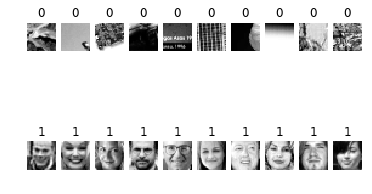

In [4]:
# Visualize some examples from the dataset.
samples_per_class = 10
classes = [0, 1]
train_imgs = np.reshape(X_train, [-1, 24, 24], order='F')

for y, cls in enumerate(classes):
    idxs = np.flatnonzero(np.equal(y_train, cls))
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = y * samples_per_class + i + 1
        plt.subplot(len(classes), samples_per_class, plt_idx)
        plt.imshow(train_imgs[idx])
        plt.axis('off')
        plt.title(cls)
plt.show()

Finally, we add the intercept term by concatenating a vector of ones to the train and test data:

In [5]:
# Add intercept to X and normalize to range [0, 1]
X_train = np.concatenate((np.ones((num_train, 1)), X_train/255.), axis=1)
X_test = np.concatenate((np.ones((num_test, 1)), X_test/255.), axis=1)

## Exercise 1: Sigmoid [5 Points]

**TODO**: Implement the sigmoid function in ***assignment1/sigmoid.py*** according to the specifications. 

**NOTE**: The function should work with inputs of arbitrary shape!

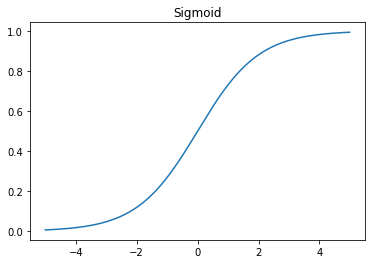

In [6]:
# Test your sigmoid
z_test = np.arange(-5, 5, 0.01)
g_test = sigmoid(z_test)
plt.plot(z_test, g_test)
plt.title('Sigmoid')
plt.show()

## Exercise 2: Log-Likelihood [10 Points]

**TODO**: Implement the log-likelihood for Logistic Regression in ***assignment1/cost_function.py*** according to specs.

What value of the cost do you expect with a parameter vector *theta* of all zeros? Check your implementation for this!

**Hint**: No for-loops are required! Use np.sum and np.dot instead...

In [7]:
# Test your cost-function
theta_0 = np.zeros(X_train.shape[1])
l_0 = cost_function(theta_0, X_train, y_train)
print('Log-likelihood with initial theta: ', l_0)

Log-likelihood with initial theta:  -9622.26916053316


## Exercise 3: The Gradient [10 Points]

**TODO**: Implement the gradient of the log-likelihood for Logistic Regression in ***assignment1/gradient_function.py*** according to specs. 

**NOTE**: Your implementation should work with a single example x (i.e., a vector) or multiple examples X (i.e., a matrix).

Consider again what value you would expect with *theta* equal to zero and test your implementation:


In [8]:
# Test your implementation
x_test = np.ones([2, 10])
theta_0 = np.zeros(10)
grad_0 = gradient_function(theta_0, x_test, 1.0)
print(grad_0)

[[0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]]


# Exersice 4: The Learning Algorithmms

This is the main part of the assignment. Correctness of the implementation is required to get the points (work on speed later). 

## a) Logistic Regression with SGD [15 Points]

**TODO**: Implement the function in ***assignment1/logistic_SGD.py*** according to specs.

## b) Gaussian Discriminant Analysis [15 Points]

**TODO**: Implement the function in ***assignment1/gda.py*** according to specs.



***Hint***: No additional for-loops are required!

Iter 0/100000: cost = -10272.570094  (0.000211000442505s)
Iter 10000/100000: cost = -3415.74286472  (1.81198120117e-05s)
Iter 20000/100000: cost = -2860.55742274  (1.71661376953e-05s)
Iter 30000/100000: cost = -3118.12867325  (1.81198120117e-05s)
Iter 40000/100000: cost = -2682.1258936  (1.69277191162e-05s)
Iter 50000/100000: cost = -2660.22650338  (1.78813934326e-05s)
Iter 60000/100000: cost = -2648.24688454  (1.69277191162e-05s)
Iter 70000/100000: cost = -2952.31852141  (1.69277191162e-05s)
Iter 80000/100000: cost = -2613.86967122  (1.71661376953e-05s)
Iter 90000/100000: cost = -2561.69582466  (1.78813934326e-05s)
Total exection time: 1.98134088516s


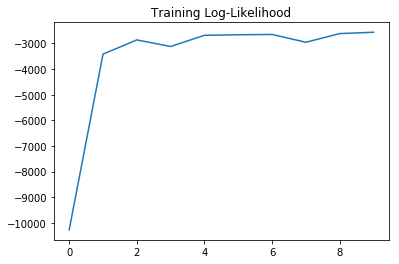

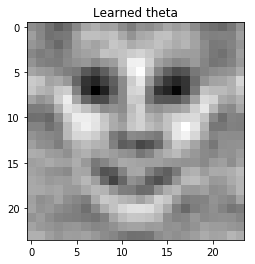

In [13]:
method = 'sgd'

# We'll meausure the execution time
start = time.time()

if method is 'sgd':
    theta, losses = logistic_SGD(X_train, y_train)
elif method is 'gda':
    theta, losses = gda(X_train, y_train)
else:
    raise ValueError('Method not recognised!')

exec_time = time.time()-start
print('Total exection time: {}s'.format(exec_time))

if losses:
    plt.plot(losses)
    plt.title('Training Log-Likelihood')
    plt.show()

# We can have a look at what theta has learned to recognise as "face"
plt.imshow(np.reshape(theta[1:], [24, 24], order='F'))
plt.title('Learned theta')
plt.show()

### Exercise 6: Testing the Classifier [10 Points]

**TODO**: Implement ***assignment1/predict_function.py*** according to specs. 

Test your implementation with the intial all zero theta as well! Does it match your expectation?

***Hint***: All the methods should score above 90% on both the test and train set!

In [14]:
# Test the final classifier
pred_test, accuracy_test = predict_function(theta, X_test, y_test)
pred_train, accuracy_train = predict_function(theta, X_train, y_train)
print('Test accuracy: {}'.format(accuracy_test))
print('Training accuracy: {}'.format(accuracy_train))

Test accuracy: 0.922857142857
Training accuracy: 0.927604091629


### Exercise 7: Preprocessing [15 Points]

**TODO**: Implement ***assignment1/features.py*** according to specs.

Up to this point we trained our classifiers dirrectly on image pixel intensities. 
In this exercise you should extract HOG features from the training and test images and train on the extracted features. Make sure that you reshape the extracted HOG features before you start training. 
For HOG feature extractor you can have a look at http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_hog.html#sphx-glr-auto-examples-features-detection-plot-hog-py. For documentation please have a look at http://scikit-image.org/docs/dev/api/skimage.feature.html#skimage.feature.hog. Make sure that you tune the parameters of the HOG feature extractor to get the best performance.

HOG feature extraction can take several minutes at most on your PC.

In [11]:
# Extract HOG features
X_train_hog = hog_features(X_train)
X_test_hog = hog_features(X_test)

Lets train on HOG features and measure the testing accuracy.

Training sgd
Iter 0/100000: cost = -9618.86709673  (0.000869989395142s)
Iter 10000/100000: cost = -4420.05900698  (2.62260437012e-05s)
Iter 20000/100000: cost = -3635.91446198  (1.50203704834e-05s)
Iter 30000/100000: cost = -3294.51630271  (1.50203704834e-05s)
Iter 40000/100000: cost = -3111.73661161  (1.59740447998e-05s)
Iter 50000/100000: cost = -2990.92188029  (2.38418579102e-05s)
Iter 60000/100000: cost = -2906.11704106  (1.50203704834e-05s)
Iter 70000/100000: cost = -2847.02788106  (1.50203704834e-05s)
Iter 80000/100000: cost = -2802.09656569  (2.69412994385e-05s)
Iter 90000/100000: cost = -2764.24351645  (1.47819519043e-05s)
Total exection time for sgd: 1.82987904549s


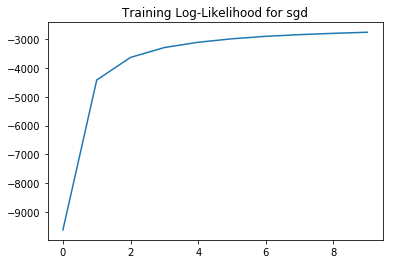

Test accuracy for sgd: 0.933613445378
Training accuracy for sgd: 0.930269413629



Training gda
Iter 1/1: cost = -472752218.422  (0.0323820114136s)
Total exection time for gda: 1.98092293739s
Test accuracy for gda: 0.93731092437
Training accuracy for gda: 0.931277913845





In [12]:
# We'll meausure the execution time
methods = ['sgd','gda']

for method in methods:
    print('Training ' + method)
    # We'll meausure the execution time
    start = time.time()

    if method is 'sgd':
        theta, losses = logistic_SGD(X_train_hog, y_train)
    elif method is 'gda':
        theta, losses = gda(X_train_hog, y_train)
    else:
        raise ValueError('Method not recognised!')

    exec_time = time.time()-start
    print('Total exection time for ' + method + ': {}s'.format(exec_time))

    if losses:
        plt.plot(losses)
        plt.title('Training Log-Likelihood for ' + method)
        plt.show()

    pred_test, accuracy_test = predict_function(theta, X_test_hog, y_test)
    pred_train, accuracy_train = predict_function(theta, X_train_hog, y_train)
    print(str('Test accuracy for ' + method + ': '+'{}').format(accuracy_test))
    print(str('Training accuracy for ' + method + ': '+'{}\n\n\n').format(accuracy_train))

### Exercise 8: Discussion [20 Points]

Answer the following questions and justify your answers:

* Based on your results, which classifier do you prefer and why?

     TODO


* Logistic Regression vs. GDA: Give advantages and disadvantages of both approaches. How would you expect the results to change if more or less data were used during training?

     SGD: Pretty accurate without many assumptions, simpler
     GDA: Accurate if assumptions are true, not so accurate if assumptions are wrong
     The more data we have the more accurate both algorithms will get since this is the definition of a learning 
     algorithm. the less data we have the less accurate the predictions will get aswell because of the definition of a 
     learning algorithm.
        
        
* Pixel Values VS HOG Features: Based on your results, did HOG features improve the performence of the classifier?

   Hog can improve the performance or the accuracy if you choose the arguments properly, the more you optimize the 
   performance the worse the accuracy gets and vice versa. which intuitively makes sense as the more inaccurate hog gets 
   the quicker it is to calculate it but the worse the accuracy gets.
   So to answer the questions: hog imporves perforance if you choose so by setting parameters but then it decreases 
   accuracy

### Bonus: Make it fast! [10 Points]

Optimise your implementations by making good use of Numpy. If your implementation of one of the methods is within a factor of two of the reference implementation you'll earn 5 additional points (a total of 15 points possible for the two methods).

***Hint***: No method should be significantly slower than the others in the case of optimal implementation. On my MBP they all take less than 2 seconds.